In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


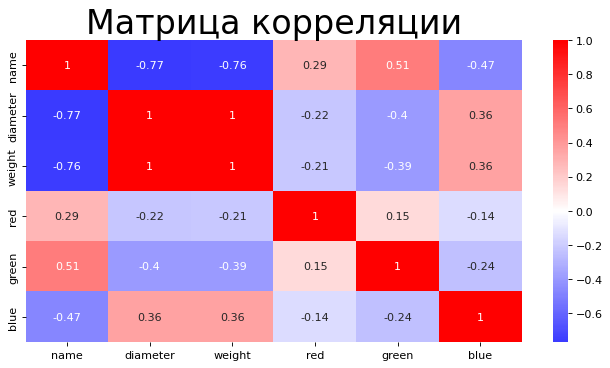

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
Data_f = pd.read_csv("/content/drive/MyDrive/citrus.csv")
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
label_encoder.fit(Data_f["name"])
Data_f["name"]=label_encoder.transform(Data_f["name"])
# Data_f.loc[(Data_f["name"] == "orange"), ('name')] = 0
# Data_f.loc[(Data_f["name"] == "grapefruit"), ('name')] = 1
# Data_f = pd.get_dummies(Data_f, ['names'])
plt.figure(figsize=(10,5), dpi= 80)
sns.heatmap(Data_f.corr(), xticklabels=Data_f.corr().columns, yticklabels=Data_f.corr().columns, cmap='bwr', center=0, annot=True)
plt.title('Матрица корреляции', fontsize=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
#все признаки корреллируют друг с другом

In [ ]:
# from sklearn import preprocessing
# label_encoder=preprocessing.labelEncoder()
# label_encoder.fit(Data_f["names"])
# Data_f["names"]=label_encoder.transform(Data_f["names"])

In [33]:
print(Data_f.shape)
print(Data_f.isna().sum())
print(Data_f.dtypes)

(10000, 6)
name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64
name          int64
diameter    float64
weight      float64
red           int64
green         int64
blue          int64
dtype: object


In [34]:
column=Data_f.columns
for i in column:
  temp=Data_f[i].unique().tolist()
  print("__________________________"+i+"________________________")
  for j in temp:
    if isinstance(j,str):
      print(j)

__________________________name________________________
__________________________diameter________________________
__________________________weight________________________
__________________________red________________________
__________________________green________________________
__________________________blue________________________


In [36]:
from sklearn.model_selection import train_test_split
x=Data_f.drop(columns=["name"])
y=Data_f["name"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [37]:
w0 = model.intercept_[0]
w1 = model.coef_[0]
result=""
result+=str(w0)
names=list(Data_f.columns)
names.pop()
for i in range(len(w1)):
  result+=" +"+" "+str(w1[i])+"*"+str(names[i])
result
#наиболее значимым оказался вес фрукта, наименее значимыми параметрами оказались цвета

'-14.18489522427867 + -14.41968942682798*name + 0.8208648483114863*diameter + 0.05158103387690953*weight + 0.1070215212842456*red + -0.11560758926504275*green'

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
confusion_matrix(y_test, pred)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print("accuracy: "+str((tp+tn)/(tp+tn+fp+fn)))#кол-во верных относительно общего числа объектов
print("recall: "+str((tp)/(tp+fn)))#кол-во правильно определенных с пометкой 1 (выше полнота меньше пропусков)
print("precision: "+str((tp)/(tp+fp)))#долю определивших положительно , которые являются положительными (выше точность меньше ложных срабатываний)
print("f1:score: "+str(2*(((tp)/(tp+fp))*((tp)/(tp+fn)))/(((tp)/(tp+fp))+((tp)/(tp+fn)))))
#Модель обучена хорошо (высокая общая точность,высокая точность,высокая полнота)

TN: 956
FP: 30
FN: 66
TP: 948
accuracy: 0.952
recall: 0.9349112426035503
precision: 0.9693251533742331
f1:score: 0.9518072289156626


In [39]:
confusion_matrix(y_test, pred)

array([[956,  30],
       [ 66, 948]])

In [40]:
print(accuracy_score(y_test, pred))
print(recall_score(y_test, pred))
print(precision_score(y_test, pred))
print(f1_score(y_test, pred))

0.952
0.9349112426035503
0.9693251533742331
0.9518072289156626


In [ ]:
# 0.955
# 0.94
# 0.9690721649484536
# 0.9543147208121826

In [9]:
Data_f.head()

,diameter,weight,red,green,blue,names_grapefruit,names_orange
0,2.96,86.76,172,85,2,0,1
1,3.91,88.05,166,78,3,0,1
2,4.42,95.17,156,81,2,0,1
3,4.47,95.60,163,81,4,0,1
4,4.48,95.76,161,72,9,0,1


In [ ]:
Data_f = pd.read_csv("/content/drive/MyDrive/citrus.csv")
Data_f.loc[(Data_f["name"] == "orange"), ('name')] = 0
Data_f.loc[(Data_f["name"] == "grapefruit"), ('name')] = 1